In [1]:
import numpy as np
from scipy import linalg as la
from os import walk
from scipy.ndimage import imread
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def plot(img, w=200, h=180):
    """Helper function for plotting flattened images."""
    plt.imshow(img.reshape((w,h)), cmap = 'gray')
    plt.show()

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


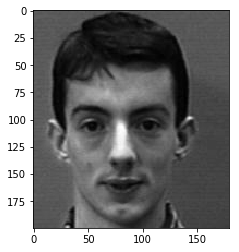

In [3]:
# Problem 1
  
def getFaces(path="./faces94"):
    """Traverse the directory specified by 'path' and return an array containing one column vector per subdirectory.
    For the faces94 dataset, this gives an array with just one column for each face in the dataset.
    Each column corresponds to a flattened grayscale image.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg":          # only get jpg images
                 # Load the image, convert it to grayscale, and flatten it into vector.
                faces.append(imread(dirpath+"/"+f).mean(axis=2).ravel())
                break
    # Put all face vectors column-wise into a matrix.
    return np.transpose(faces)
img = getFaces()

plot(img[:,87])

# The Facial Recognition class

In [4]:
# Problems 2, 3, 4, 5
class FacialRec:
    """
    Attributes:
        F
        mu
        Fbar
        U
    """
    def __init__(self,path):
        self.initFaces(path)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
    def initFaces(self, path):
        self.F = getFaces()
        #pass
    def initMeanImage(self):
        self.mu = sum(self.F[:,i] for i in range(self.F.shape[1]))/float(self.F.shape[1])
        #pass
    def initDifferences(self):
        self.Fbar = self.F - np.vstack(self.mu)
        #pass
    def initEigenfaces(self):
        u,sig,v = la.svd(self.F,full_matrices = False)
        self.eig = u
        #pass
    def project(self, A, s=38):
        return np.dot(self.eig[:,:s].T,A)
    def findNearest(self, image, s=38):
        """Project Fbar, producing a matrix whose columns are f-hat"""
    # Fhat =
        fhat = self.project(self.Fbar,s)
        np.asarray(fhat)
        """Shift 'image' by the mean and project, producing g-hat"""
    # ghat =
        ghat = self.project((image-self.mu),s)
        np.asarray(ghat)
        """For both Fhat and ghat, use your project function from the previous problem.
    Return the index that minimizes ||fhat_i - ghat||_2."""
        dif = fhat.T-ghat.T
        norm = la.norm(dif, ord = 2, axis = 1)
        i = np.argmin(norm)
        return self.F[:,i]
k = FacialRec('./faces94')

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


### The mean face of all of our faces

The mean face


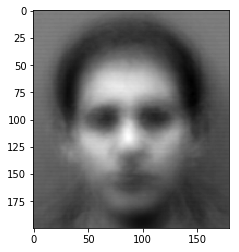

In [6]:
img = k.mu
print('The mean face')
plot(img)

### Shifting a random face by our mean image

A shifted face


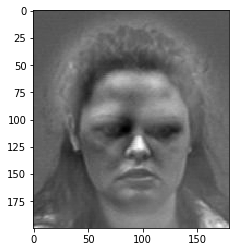

In [8]:
print('A shifted face')
shift = k.Fbar
plot(shift[:,14])

### While the mean face isn't as useful for analysis, the eigenfaces are. 

The first eigenface


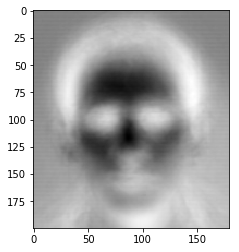

In [9]:
print('The first eigenface')
eig = k.eig
plot(eig[:,0])


### In order to utilize the eigenfaces, we need to change the basis for our image, and then change it back afterwards

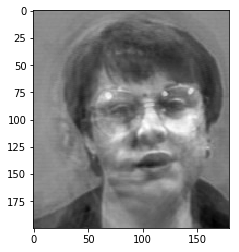

In [10]:
newface = np.dot(k.eig[:,:19],k.project(k.Fbar[:,0],19))
newface = newface + k.mu
plot(newface)

### Using the components described abvove, the program is able to recognize faces. Given a specific face, we search our database to find it.

Target Image:


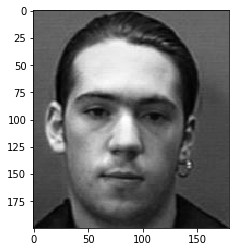

Nearest image


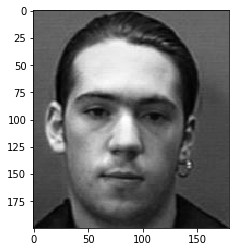

In [12]:
image = k.F[:,45]
close = k.findNearest(image)
print('Target Image:')
plot(image)
print('Nearest image')
plot(close)